## Module 18: Learning Notebook: Introduction to Unsupervised Leaning: 

The KMeans algorithm:

So far, all of our datasets have had a target (or label). This is what you are tyring to predict. But what if your data had no such target? We can't run a supervised learning algorithm like linear regression, support vector machines or XGBOOST. So what can we do? 

This is where unsupervised learning comes in. The goal is to put the data into similar groups. This process is called "clustering". Once the model is trained, you can then predict which cluster a new, unseen datapoint will likely fall into.

The most common algorithm to do clustering is called KMeans.

In [2]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import boto3
import pandas as pd
import numpy as np
import seaborn as sns

### 1. Load and investigate data

In [3]:
# Load from S3
sess = boto3.session.Session()
s3 = sess.client('s3') 
source_bucket = 'machinelearning-read-only'
source_key = 'data/mall_customers.csv' 
response = s3.get_object(Bucket = source_bucket, Key = source_key)
df = pd.read_csv(response.get("Body"))
print('df size (rows, columns):',df.shape)
df.head()

df size (rows, columns): (200, 4)


,Gender,Age,Annual_Income,Spending_Score
0,Male,19,15,39
1,Male,21,15,81
2,Female,20,16,6
3,Female,23,16,77
4,Female,31,17,40


In [4]:
# Let's simplify the data so we can plot the results in 2D
X = df[['Annual_Income','Spending_Score']]
X.head()

,Annual_Income,Spending_Score
0,15,39
1,15,81
2,16,6
3,16,77
4,17,40


### 2. Create, train and predict the cluster for each customer

In [5]:
# Create the model
kmeans = KMeans(n_clusters=3, random_state=42) # n_clusters = 3 is arbitrary for this example. We'll discuss below.
# Train the model
kmeans.fit(X)
# Predict which cluster each row belongs
y_pred = kmeans.predict(X)
y_pred

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 1, 2, 1, 2, 1, 2, 1, 2,
       1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2,
       1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2,
       1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2,
       1, 2], dtype=int32)

In [6]:
# Build a dataframe of both the features and the predicted clusters
y_pred_df = pd.DataFrame(data = y_pred, columns = ['predicted_cluster'])
df2 = pd.concat([X, y_pred_df], axis=1)
df2.tail()

,Annual_Income,Spending_Score,predicted_cluster
195,120,79,2
196,126,28,1
197,126,74,2
198,137,18,1
199,137,83,2


In [7]:
# How many ended up in each cluster?
df2['predicted_cluster'].value_counts()

0    123
2     39
1     38
Name: predicted_cluster, dtype: int64

### 3. Display the clusters

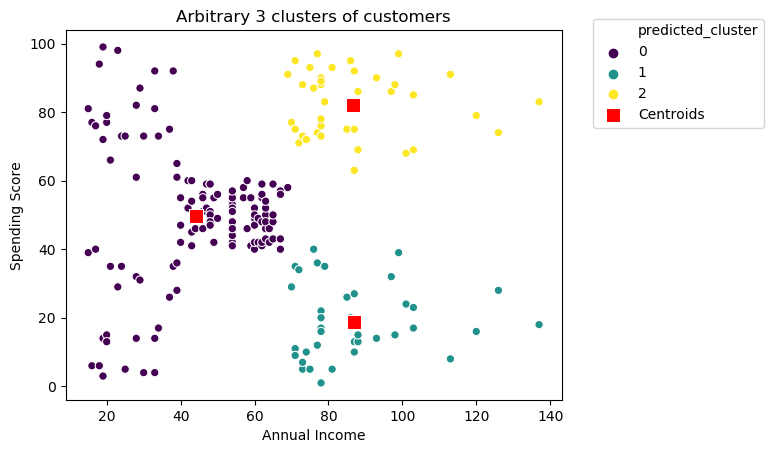

In [8]:
# Plot the clusters and centroids
sns.scatterplot(x = df2["Annual_Income"], y = df2["Spending_Score"],hue = df2['predicted_cluster'],
                data=df2,palette='viridis')
sns.scatterplot(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], color = 'red', 
                label = 'Centroids',s=100,marker=',')
plt.grid(False)
plt.title('Arbitrary 3 clusters of customers')
plt.xlabel('Annual Income')
plt.ylabel('Spending Score')
plt.legend(bbox_to_anchor = (1.05, 1.05))
plt.show()

### 4. Determine the best number of clusters

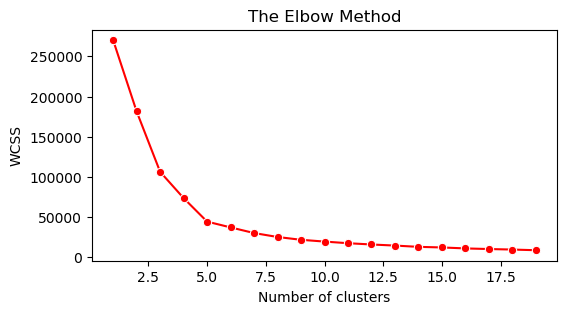

In [9]:
# Using the elbow method to find the optimal number of clusters
wcss = [] # This will be the "Within Cluster Sum of Squares" a performance metric
for i in range(1, 20):
    kmeans = KMeans(n_clusters = i, random_state = 42)
    kmeans.fit(X)
    # inertia method returns wcss for that model. We want minimize this with the fewest clusters.
    wcss.append(kmeans.inertia_)
# Plot
plt.figure(figsize=(6,3))
sns.lineplot(range(1, 20), wcss,marker='o',color='red')
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

### 5. Model again with a better value of k

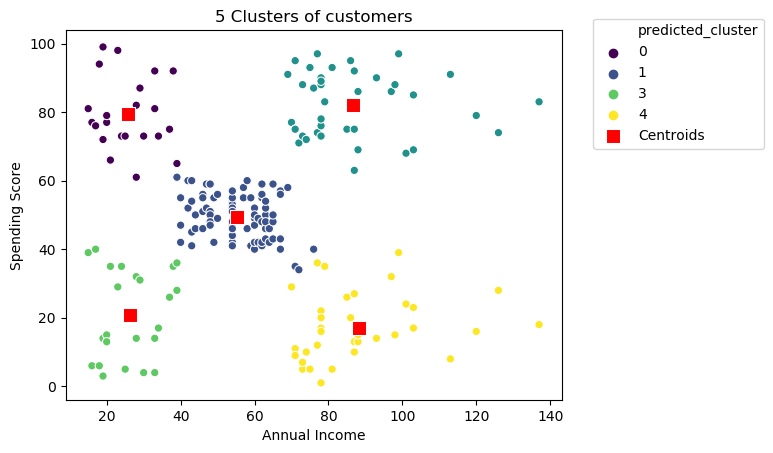

In [10]:
# Do it again with k = 5
kmeans = KMeans(n_clusters = 5, random_state=42)
kmeans.fit(X)
y_pred = kmeans.predict(X)
y_pred_df = pd.DataFrame(data = y_pred, columns = ['predicted_cluster'])
df3 = pd.concat([X, y_pred_df], axis=1)
# Plot the clusters and centroids
sns.scatterplot(x = df3["Annual_Income"], y = df3["Spending_Score"],hue = df3['predicted_cluster'],
                data=df3,palette='viridis')
sns.scatterplot(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], color = 'red', 
                label = 'Centroids',s=100,marker=',')
plt.grid(False)
plt.title('5 Clusters of customers')
plt.xlabel('Annual Income')
plt.ylabel('Spending Score')
plt.legend(bbox_to_anchor = (1.05, 1.05))
plt.show()

### 6. Predict the cluster for a new, unseen customer

In [11]:
# Predict a new customer
new_cust = pd.DataFrame(data= [[22,80]]) # Annual income and Spending score
print('The new customer belongs in cluster:', kmeans.predict(new_cust).item())

The new customer belongs in cluster: 0


In [12]:
# I found this interesting, but didn't get to it. A little more advanced:
#https://towardsdatascience.com/interpretable-k-means-clusters-feature-importances-7e516eeb8d3c